In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression


In [ ]:
# Mount Google Drive into Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import Data from Google Colab
df = pd.read_csv("Alcohol_Consumption_US.csv")



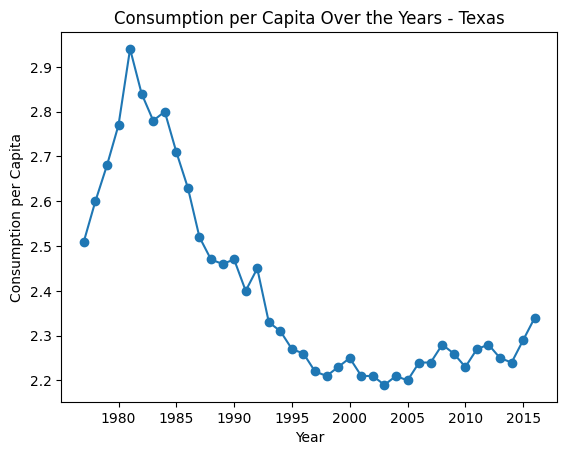

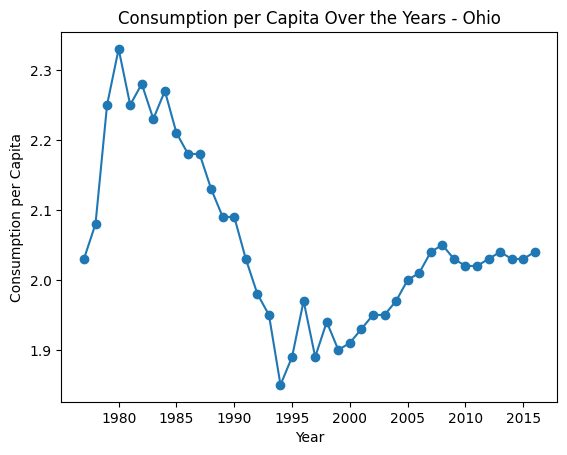

In [ ]:
# Selecting the Texas data
specific_state = 'Texas'
filtered_df = df[df['State'] == specific_state]

# Plotting the line chart of Texas' bevergae consumption
plt.plot(filtered_df['Year'], filtered_df['All beverages (Per capita consumption)'], marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Consumption per Capita')
plt.title(f'Consumption per Capita Over the Years - {specific_state}')

# Display the plot
plt.show()

# Selecting the Ohio data
specific_state = 'Ohio'
filtered_df = df[df['State'] == specific_state]

# Plotting the line chart of Ohio's bevergae consumption
plt.plot(filtered_df['Year'], filtered_df['All beverages (Per capita consumption)'], marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Consumption per Capita')
plt.title(f'Consumption per Capita Over the Years - {specific_state}')

# Display the plot
plt.show()

    Year  All beverages (Per capita consumption)
0   1977                                  138.99
1   1978                                  141.82
2   1979                                  142.48
3   1980                                  144.37
4   1981                                  145.50
5   1982                                  142.63
6   1983                                  141.67
7   1984                                  138.36
8   1985                                  136.77
9   1986                                  134.12
10  1987                                  132.30
11  1988                                  129.66
12  1989                                  126.50
13  1990                                  127.66
14  1991                                  121.51
15  1992                                  120.81
16  1993                                  117.66
17  1994                                  116.16
18  1995                                  114.07
19  1996            

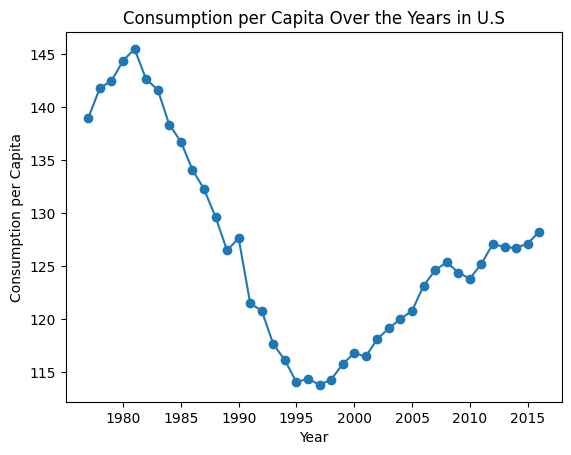

In [ ]:
# Aggregate consumptions of the entire US by year
total_consumption_by_year = df.groupby('Year')['All beverages (Per capita consumption)'].sum().reset_index()

# Display the result
print(total_consumption_by_year)


plt.plot(total_consumption_by_year['Year'], total_consumption_by_year['All beverages (Per capita consumption)'], marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Consumption per Capita')
plt.title(f'Consumption per Capita Over the Years in U.S')

# Display the plot
plt.show()

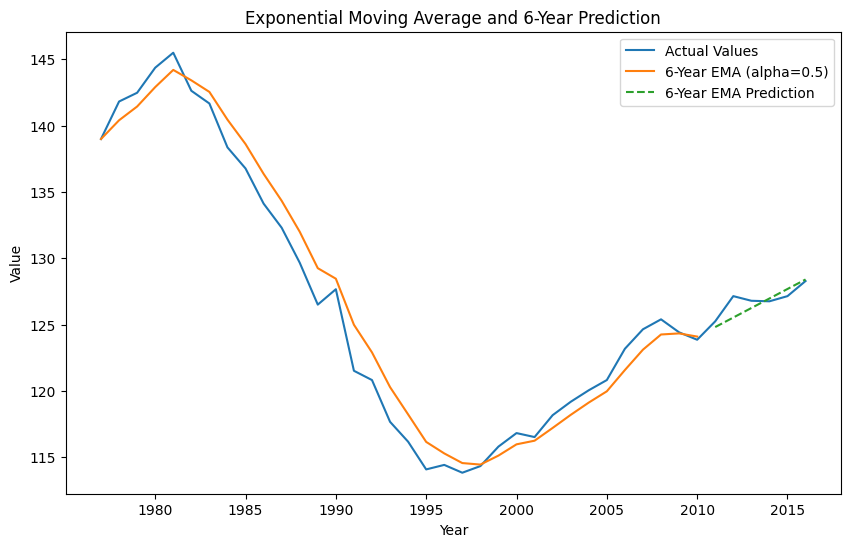

In [ ]:



# Setting alpha for Exponential Moving Average
alpha = 0.5

# Calculate the 6-Year Exponential Moving Average
total_consumption_by_year['6-Year EMA'] = total_consumption_by_year['All beverages (Per capita consumption)'].ewm(alpha=alpha, adjust=False).mean()

# Exclude the last six values from both actual values and EMA
total_consumption_by_year_minus_last_six = total_consumption_by_year.iloc[:-6]

# Make a prediction for the next 6 years based on the calculated EMA
last_year = total_consumption_by_year_minus_last_six['Year'].max()
prediction_years = range(last_year + 1, last_year + 7)
predicted_values = total_consumption_by_year_minus_last_six['6-Year EMA'].iloc[-1] + (total_consumption_by_year['6-Year EMA'].iloc[-1] - total_consumption_by_year['6-Year EMA'].iloc[-2]) * range(1, 7)

# Plot the data and prediction
plt.figure(figsize=(10, 6))
plt.plot(total_consumption_by_year['Year'], total_consumption_by_year['All beverages (Per capita consumption)'], label='Actual Values')
plt.plot(total_consumption_by_year_minus_last_six['Year'], total_consumption_by_year_minus_last_six['6-Year EMA'], label=f'6-Year EMA (alpha={alpha})')
plt.plot(prediction_years, predicted_values, label='6-Year EMA Prediction', linestyle='--')
plt.title('Exponential Moving Average and 6-Year Prediction')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()


In [ ]:

# Prints predicted values of EMA
for i, value in enumerate(predicted_values, start=1):
    rounded_value = round(value, 2)
    print(f"Predicted EMA value for year {i+2010}: {rounded_value}")


Predicted EMA value for year 2011: 124.81
Predicted EMA value for year 2012: 125.53
Predicted EMA value for year 2013: 126.24
Predicted EMA value for year 2014: 126.96
Predicted EMA value for year 2015: 127.68
Predicted EMA value for year 2016: 128.4


Exponential Smoothing Forecast for Year 1978: 138.99
Exponential Smoothing Forecast for Year 1979: 140.12
Exponential Smoothing Forecast for Year 1980: 141.07
Exponential Smoothing Forecast for Year 1981: 142.39
Exponential Smoothing Forecast for Year 1982: 143.63
Exponential Smoothing Forecast for Year 1983: 143.23
Exponential Smoothing Forecast for Year 1984: 142.61
Exponential Smoothing Forecast for Year 1985: 140.91
Exponential Smoothing Forecast for Year 1986: 139.25
Exponential Smoothing Forecast for Year 1987: 137.2
Exponential Smoothing Forecast for Year 1988: 135.24
Exponential Smoothing Forecast for Year 1989: 133.01
Exponential Smoothing Forecast for Year 1990: 130.4
Exponential Smoothing Forecast for Year 1991: 129.31
Exponential Smoothing Forecast for Year 1992: 126.19
Exponential Smoothing Forecast for Year 1993: 124.04
Exponential Smoothing Forecast for Year 1994: 121.49
Exponential Smoothing Forecast for Year 1995: 119.36
Exponential Smoothing Forecast for Year 1996: 11

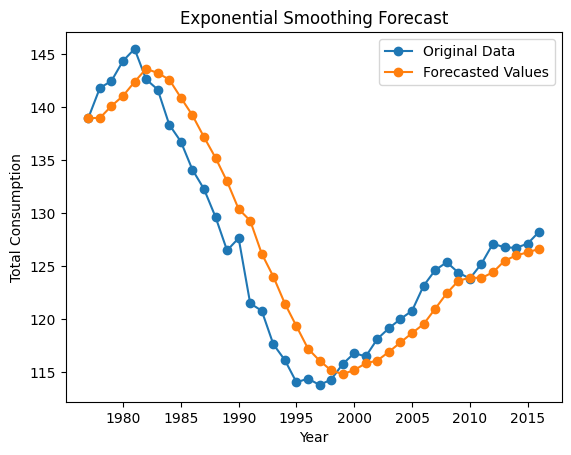

In [ ]:
# Loading and storing aggregated column
total_consumption_by_year_m = total_consumption_by_year['All beverages (Per capita consumption)']
# Initialize the forecast for period 1 (just for calculation)
forecast = total_consumption_by_year_m[0]

# Smoothing constant
smoothing_constant = 0.4

# List to store the forecasts
forecasts = []

# Calculate forecast for periods 2 to 2016 using exponential smoothing
for i in range(1, min(2017, len(total_consumption_by_year_m) + 1)):
    if i == 1:
        # Forecast for period 2 using naive approach
        forecast = total_consumption_by_year_m[0]
    else:
        # Exponential smoothing for subsequent periods
        forecast = smoothing_constant * total_consumption_by_year_m[i - 2] + (1 - smoothing_constant) * forecast

    forecasts.append(round(forecast, 2))  # Round to two decimals

# Display forecasts for periods 2 (1978) to 40 (2016)
for i, forecast in enumerate(forecasts[1:], start=2):
    print(f"Exponential Smoothing Forecast for Year {i+1976}: {forecast}")


# Defining a variable for the y-axis of years
years = range(1977, 1977 + len(total_consumption_by_year_m))

# Plotting the forecast
plt.plot(years, total_consumption_by_year_m, label='Original Data', marker='o')
plt.plot(years, forecasts, label='Forecasted Values', marker='o')

plt.title('Exponential Smoothing Forecast')
plt.xlabel('Year')
plt.ylabel('Total Consumption')
plt.legend()
plt.show()

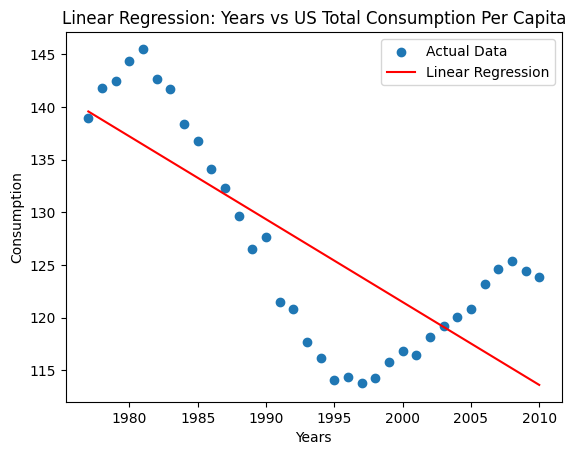

In [ ]:

# Removing last 6 values because that is what we will be predicting
X = total_consumption_by_year.iloc[:-6]['Year'].values.reshape(-1, 1)  # Reshape to make it a 2D array
y = total_consumption_by_year.iloc[:-6]['All beverages (Per capita consumption)'].values

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Plot the data and the linear regression line
plt.scatter(X, y, label='Actual Data')
plt.plot(X, y_pred, 'r-', label='Linear Regression')
plt.xlabel('Years')
plt.ylabel('Consumption')
plt.title('Linear Regression: Years vs US Total Consumption Per Capita')
plt.legend()
plt.show()

In [ ]:
# Generate the next five years
future_years = np.arange(2011, 2017).reshape(-1, 1)

# Use the trained model to make predictions for the future years
future_consumption = model.predict(future_years)

# Display the predicted consumption for the next five years
for year, consumption in zip(future_years.flatten(), future_consumption):
    print(f"Year: {year}, Predicted Consumption: {consumption}")

Year: 2011, Predicted Consumption: 112.84213903743307
Year: 2012, Predicted Consumption: 112.05607639419395
Year: 2013, Predicted Consumption: 111.27001375095483
Year: 2014, Predicted Consumption: 110.48395110771571
Year: 2015, Predicted Consumption: 109.69788846447659
Year: 2016, Predicted Consumption: 108.91182582123747


In [ ]:
# Get the slope (coefficient) and intercept of the linear regression model
slope = model.coef_[0]
intercept = model.intercept_

# Display the regression equation
print(f"Regression Equation: y = {slope:.3f} * Years + {intercept:.3f}")

Regression Equation: y = -0.786 * Years + 1693.614


In [ ]:
# Demand and forecasted values for both techniques
actual = total_consumption_by_year['All beverages (Per capita consumption)'][-6:]
technique1_forecast = predicted_values
technique2_forecast = forecasts[-6:]
technique3_forecast = future_consumption

# Calculate absolute errors for both techniques
error_technique1 = np.abs(actual - technique1_forecast)
error_technique2 = np.abs(actual - technique2_forecast)
error_technique3 = np.abs(actual - technique3_forecast)

# Calculate Mean Absolute Deviation (MAD) and round to two decimal places
mad_technique1 = np.round(np.mean(error_technique1), 2)
mad_technique2 = np.round(np.mean(error_technique2), 2)
mad_technique3 = np.round(np.mean(error_technique3), 2)

print("MAD for Technique 1:", mad_technique1)
print("MAD for Technique 2:", mad_technique2)
print("MAD for Technique 3:", mad_technique3)


MAD for Technique 1: 0.58
MAD for Technique 2: 1.41
MAD for Technique 3: 16.01


In [ ]:

# Calculate MSE for each forecast by squaring MAD

mse1 = (mad_technique1**2)
mse2 = (mad_technique2**2)
mse3 = (mad_technique3**2)

print("MSE for Technique 1:", mse1)
print("MSE for Technique 2:", mse2)
print("MSE for Technique 3:", mse3)

# Calculate MAPE by dividing the MAD by the sum of the actual values divided by the number of actual values and then multiplying the quotient by 100
mape1 = (mad_technique1 / (sum(actual)/len(actual)))*100
mape2 = (mad_technique2 / (sum(actual)/len(actual)))*100
mape3 = (mad_technique3 / (sum(actual)/len(actual)))*100

print("MAPE for Technique 1:", mape1)
print("MAPE for Technique 2:", mape2)
print("MAPE for Technique 3:", mape3)


MSE for Technique 1: 0.3364
MSE for Technique 2: 1.9880999999999998
MSE for Technique 3: 256.3201
MAPE for Technique 1: 0.4570888170856647
MAPE for Technique 2: 1.1111986760185988
MAPE for Technique 3: 12.617227519899126


In [ ]:
print("forecast: Exponential Moving Average")
print("")
print("MAD for Technique 1:", round(mad_technique1, 2))
print("MSE for Technique 1:", round(mse1, 2))
print("MAPE for Technique 1:", round(mape1, 2))
print("")
print("forecast: Exponential Smoothing")
print("")
print("MAD for Technique 2:", round(mad_technique2, 2))
print("MSE for Technique 2:", round(mse2, 2))
print("MAPE for Technique 2:", round(mape2, 2))
print("")
print("forecast: Regression")
print("")
print("MAD for Technique 3:", round(mad_technique3, 2))
print("MSE for Technique 3:", round(mse3, 2))
print("MAPE for Technique 3:", round(mape3, 2))

forecast: Exponential Moving Average

MAD for Technique 1: 0.58
MSE for Technique 1: 0.34
MAPE for Technique 1: 0.46

forecast: Exponential Smoothing

MAD for Technique 2: 1.41
MSE for Technique 2: 1.99
MAPE for Technique 2: 1.11

forecast: Regression

MAD for Technique 3: 16.01
MSE for Technique 3: 256.32
MAPE for Technique 3: 12.62
